# Część 1 - Analiza
* Na wstepie wczytajmy nasze dane 
* Nastepnie zróbmy prostą analizę zależności miedzy zmiennymi
* Zobaczmy przykład zmiennych gausowskich

In [209]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors

from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import PolynomialFeatures

rd = pd.read_csv('./dataset/winequality-red.csv', sep=";")
wd = pd.read_csv('./dataset/winequality-white.csv', sep=";")
rwd = pd.concat([rd, wd],axis=0,ignore_index=True)
red_corr = rd.corr()
white_corr = wd.corr()
rwd_corr= rwd.corr()

In [210]:
wd.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [211]:
rd.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [212]:
rwd.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


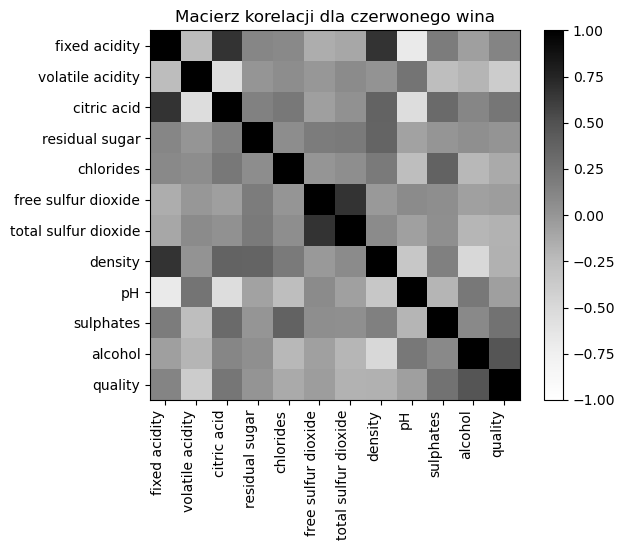

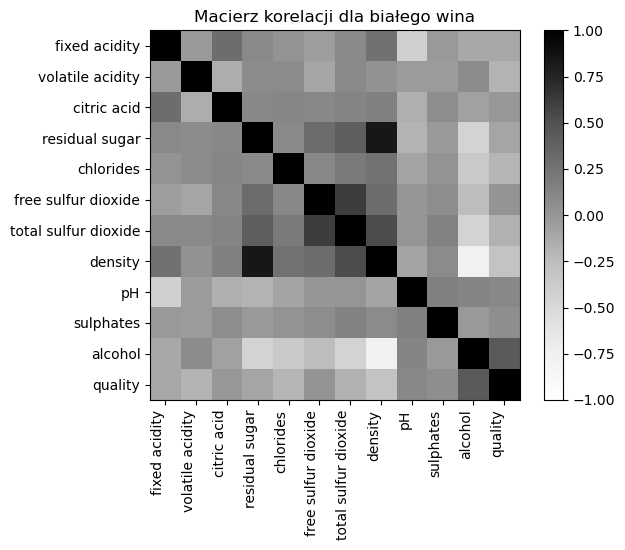

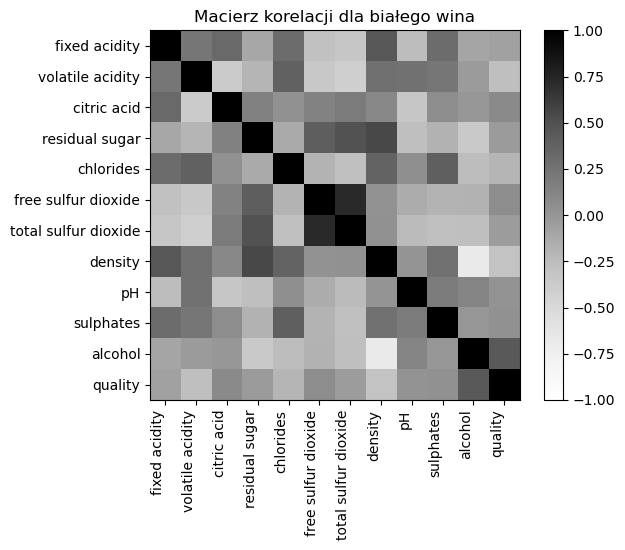

In [213]:
for x in [red_corr, white_corr, rwd_corr]:
    fig, ax = plt.subplots()
    
    divnorm = colors.TwoSlopeNorm(vmin=-1, vcenter=0, vmax=1)
    cax = ax.imshow(x, cmap='Greys', interpolation='none', norm=divnorm)
    
    ax.set_xticks(np.arange(len(x.columns)))
    ax.set_yticks(np.arange(len(x.columns)))
    ax.set_xticklabels(x.columns)
    ax.set_yticklabels(red_corr.columns)
    
    plt.title(f"Macierz korelacji dla {"czerwonego wina" if x is red_corr else "białego wina"}")
    plt.colorbar(cax)  # Pasek kolorów
    plt.xticks(rotation=90, ha="right")
    plt.grid(False)
    plt.show()

## Zabaczmy najpierw zależności dla czerwonego wina

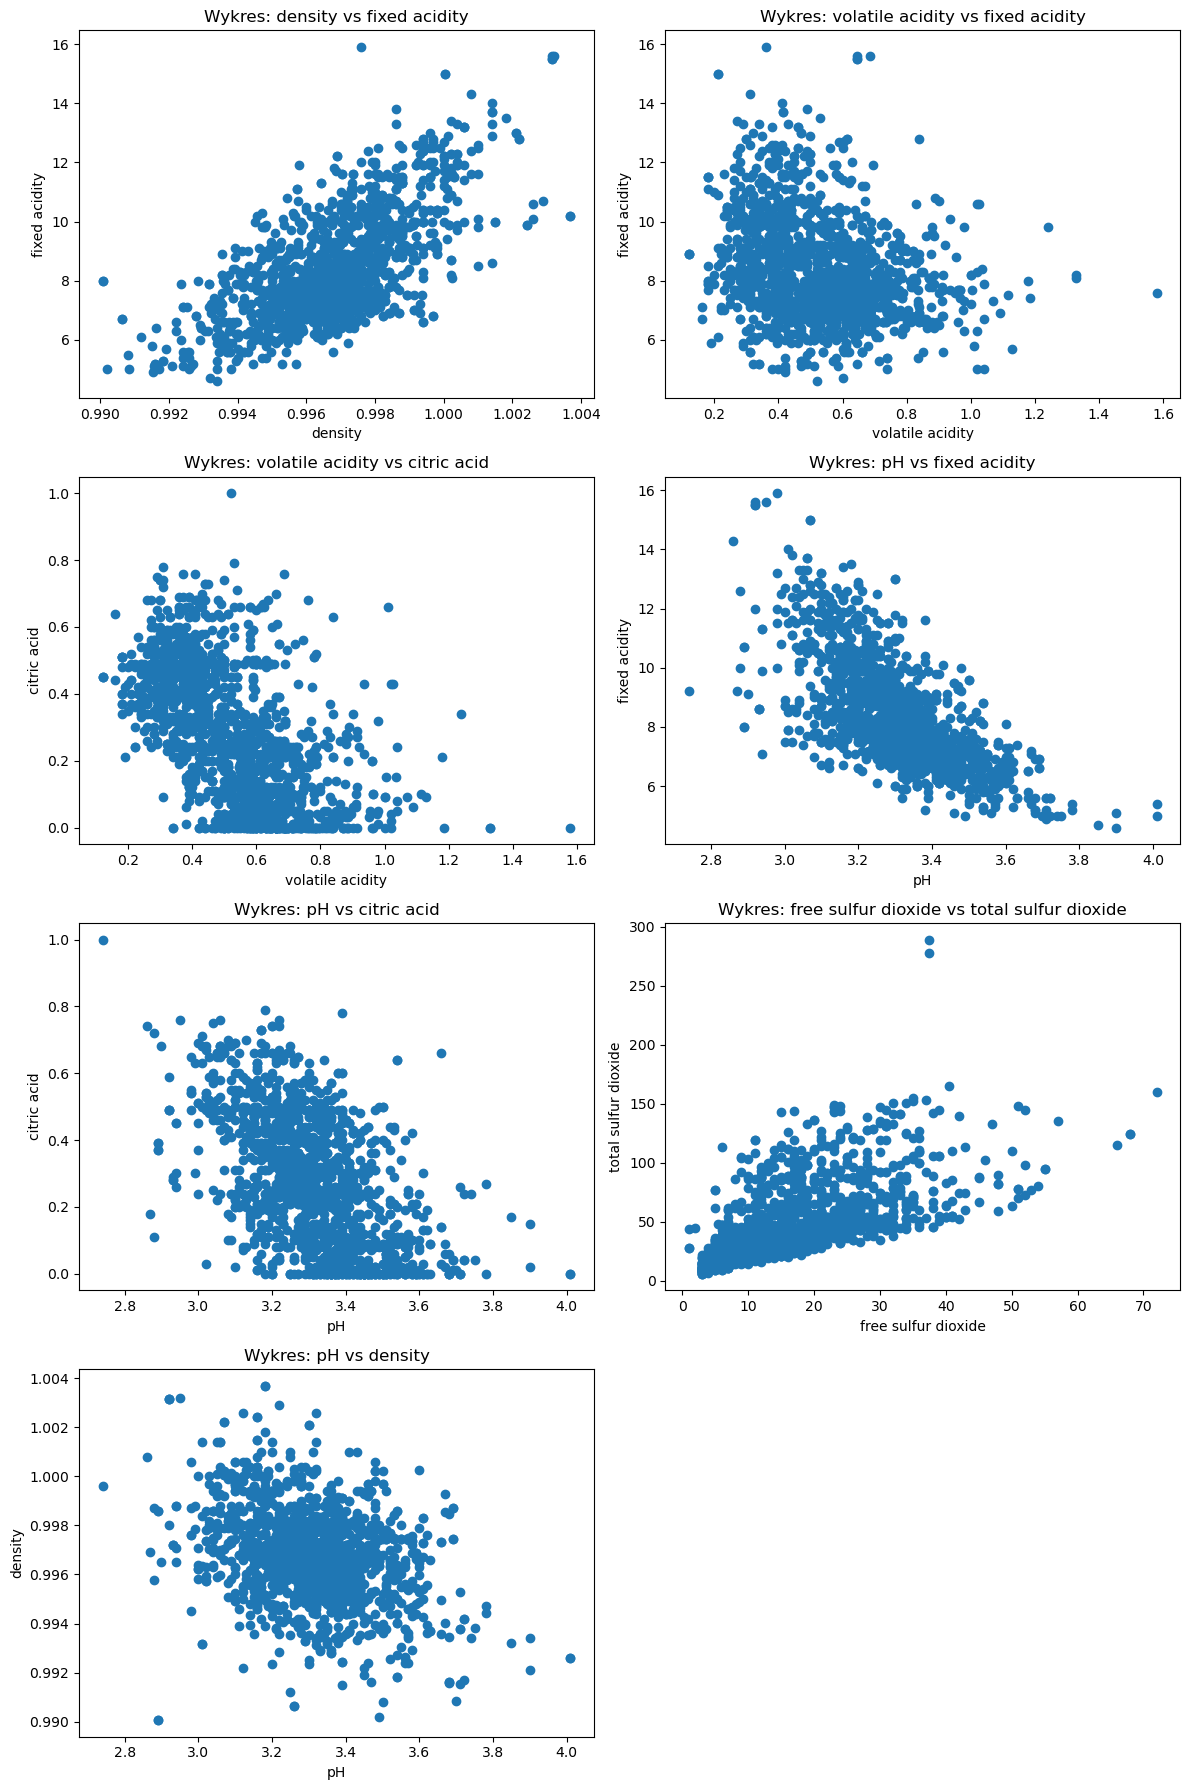

In [214]:
pairs_red = [
    (rd['density'], rd['fixed acidity']),
    (rd['volatile acidity'], rd['fixed acidity']),
    (rd['volatile acidity'], rd['citric acid']),
    (rd['pH'], rd['fixed acidity']),
    (rd['pH'], rd['citric acid']),
    (rd['free sulfur dioxide'], rd['total sulfur dioxide']),
    (rd['pH'], rd['density'])
]

fig, axs = plt.subplots(4, 2, figsize=(12, 18))
axs = axs.flatten()

for i, pair in enumerate(pairs_red):
    axs[i].scatter(pair[0], pair[1])
    axs[i].set_xlabel(pair[0].name)
    axs[i].set_ylabel(pair[1].name)
    axs[i].set_title(f'Wykres: {pair[0].name} vs {pair[1].name}')

if len(pairs_red) < len(axs):
    fig.delaxes(axs[len(pairs_red)])

plt.tight_layout()
plt.show()


## A teraz dla wina białego

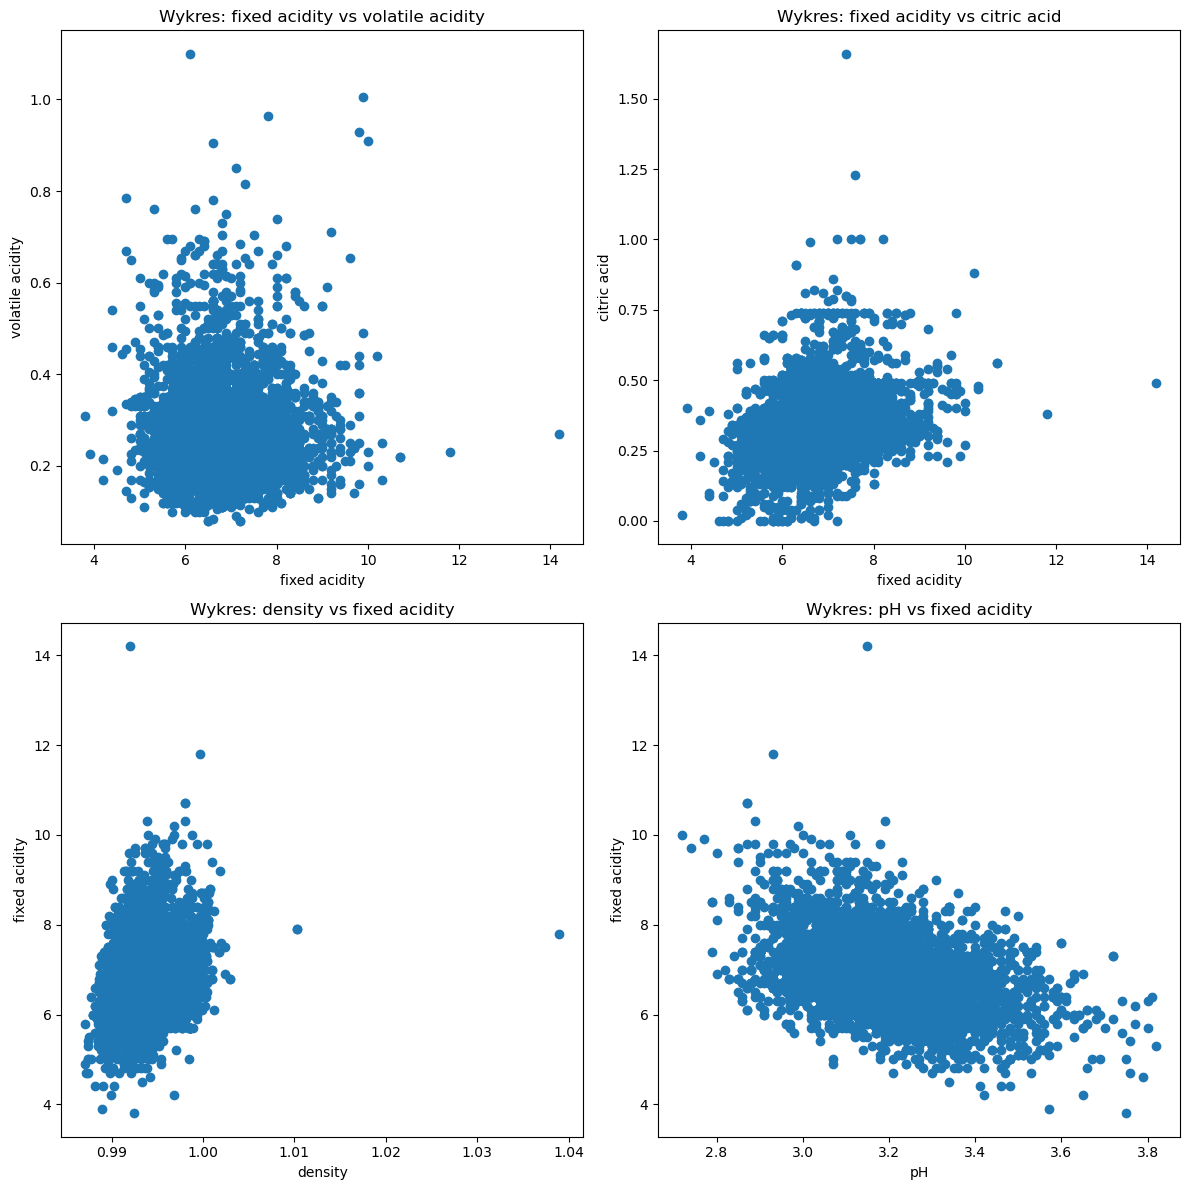

In [215]:
pairs_white = [
    (wd['fixed acidity'], wd['volatile acidity']),
    (wd['fixed acidity'], wd['citric acid']),
    (wd['density'], wd['fixed acidity']),
    (wd['pH'], wd['fixed acidity'])
]

fig, axs = plt.subplots(2, 2, figsize=(12, 12))
axs = axs.flatten()

for i, pair in enumerate(pairs_white):
    axs[i].scatter(pair[0], pair[1])
    axs[i].set_xlabel(pair[0].name)
    axs[i].set_ylabel(pair[1].name)
    axs[i].set_title(f'Wykres: {pair[0].name} vs {pair[1].name}')

if len(pairs_white) < len(axs):
    fig.delaxes(axs[len(pairs_white)])

plt.tight_layout()
plt.show()


## Teraz jeszcze dwie heatmapy pokazujace ciekawe właściwości

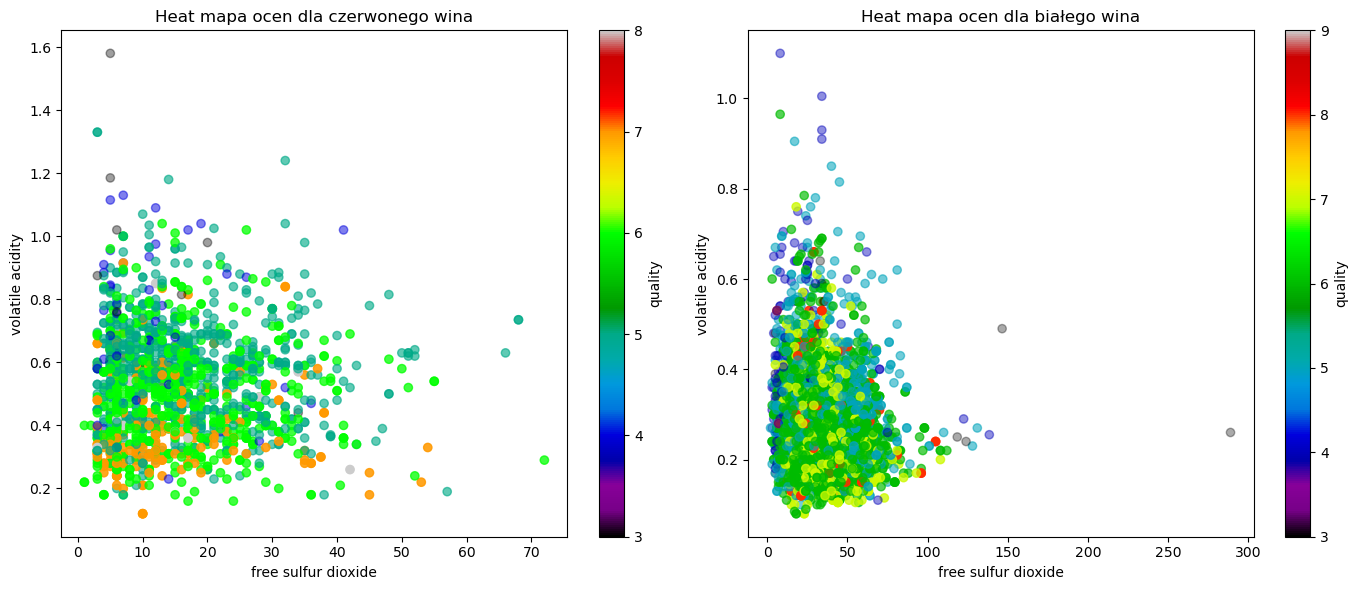

In [216]:
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Heatmapa dla czerwonego wina
scatter1 = axs[0].scatter(rd['free sulfur dioxide'], rd['volatile acidity'], cmap='nipy_spectral', c=rd['quality'], alpha=rd['quality']/(max(rd['quality'])))
axs[0].set_xlabel("free sulfur dioxide")
axs[0].set_ylabel("volatile acidity")
axs[0].set_title("Heat mapa ocen dla czerwonego wina")
cbar1 = fig.colorbar(scatter1, ax=axs[0])
cbar1.set_label('quality')

# Heatmapa dla białego wina
scatter2 = axs[1].scatter(wd['free sulfur dioxide'], wd['volatile acidity'], cmap='nipy_spectral', c=wd['quality'], alpha=wd['quality']/(max(wd['quality'])))
axs[1].set_xlabel("free sulfur dioxide")
axs[1].set_ylabel("volatile acidity")
axs[1].set_title("Heat mapa ocen dla białego wina")
cbar2 = fig.colorbar(scatter2, ax=axs[1])
cbar2.set_label('quality')

plt.tight_layout()

plt.show()


## Zmienne gausowskie dla wina czerwonego

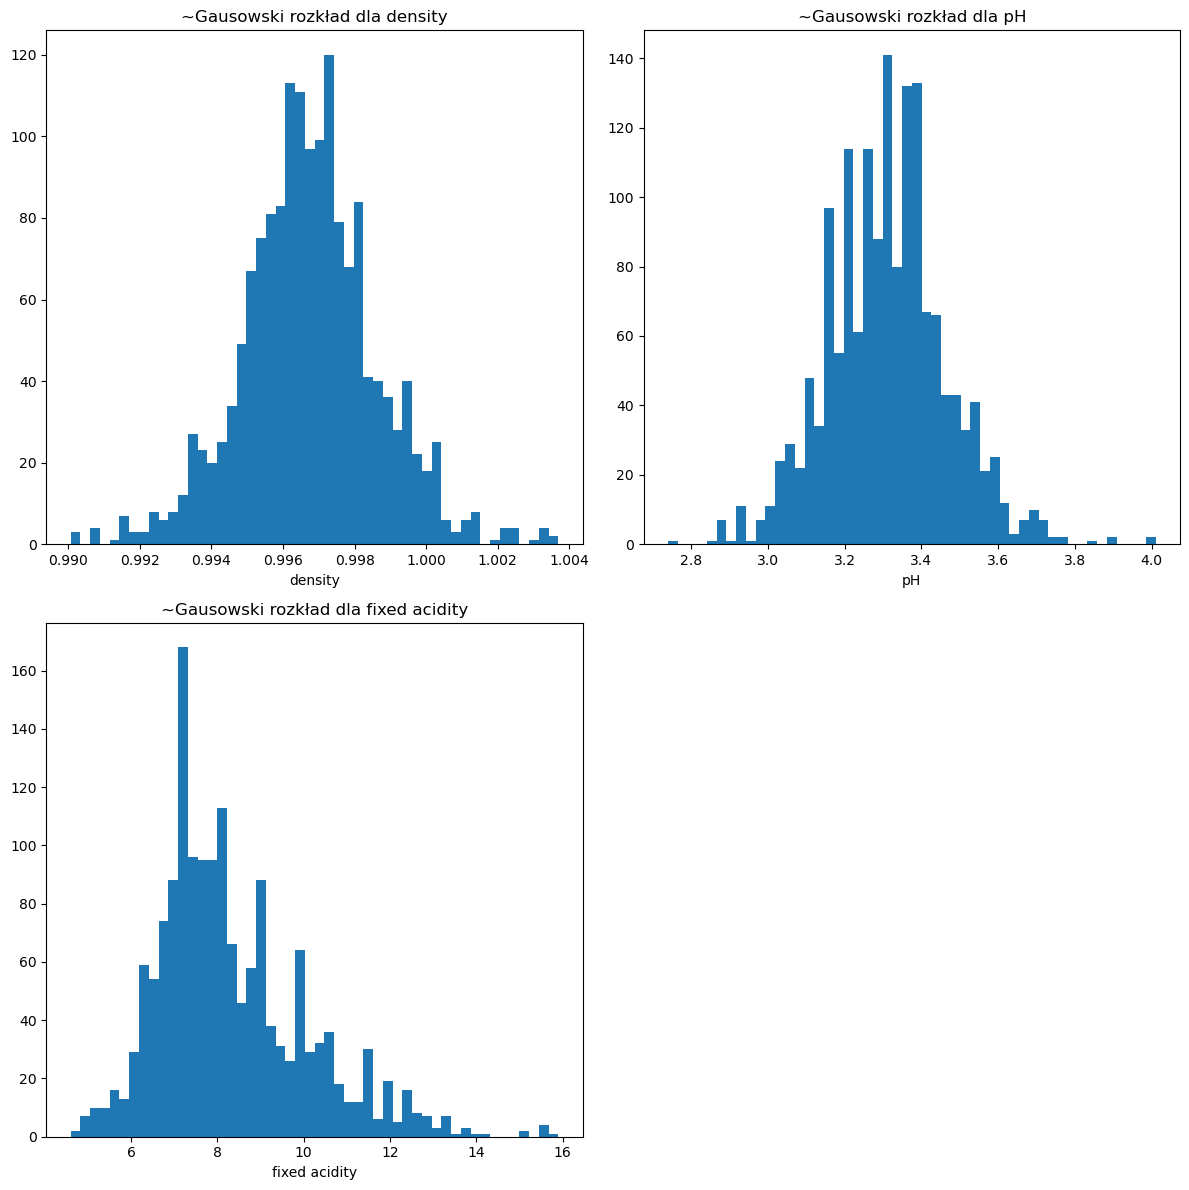

In [217]:
gausian_red = [
    rd['density'],
    rd['pH'],
    rd['fixed acidity']
]

fig, axs = plt.subplots(2, 2, figsize=(12, 12))
axs = axs.flatten()  

for i, item in enumerate(gausian_red):
    axs[i].hist(item, bins=50)
    axs[i].set_xlabel(item.name)
    axs[i].set_title(f"~Gausowski rozkład dla {item.name}")

if len(gausian_red) < len(axs):
    fig.delaxes(axs[len(gausian_red)])

plt.tight_layout()
plt.show()

## Zmienne gausowskie dla wina białego

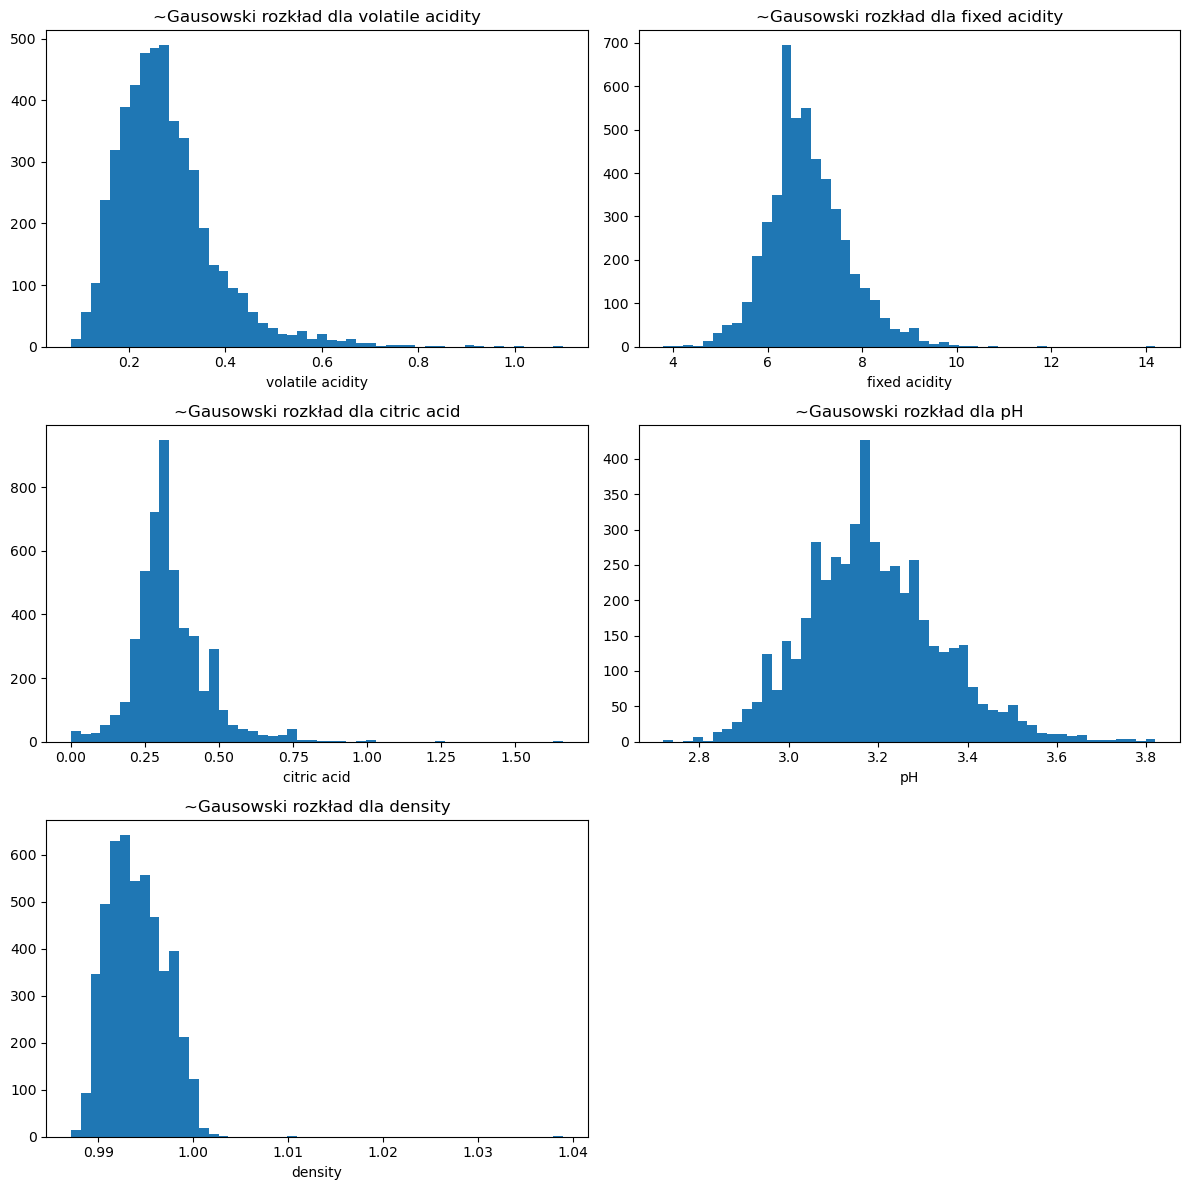

In [218]:
gausian_white = [
    wd['volatile acidity'],
    wd['fixed acidity'], 
    wd['citric acid'],
    wd['pH'], 
    wd['density']
]

fig, axs = plt.subplots(3, 2, figsize=(12, 12))
axs = axs.flatten()  

for i, item in enumerate(gausian_white):
    axs[i].hist(item, bins=50)
    axs[i].set_xlabel(item.name)
    axs[i].set_title(f"~Gausowski rozkład dla {item.name}")

if len(gausian_white) < len(axs):
    fig.delaxes(axs[len(gausian_white)])

plt.tight_layout()

plt.show()

## Zobaczmy również wykresy pudełkowe dla poszczególnych zmiennych

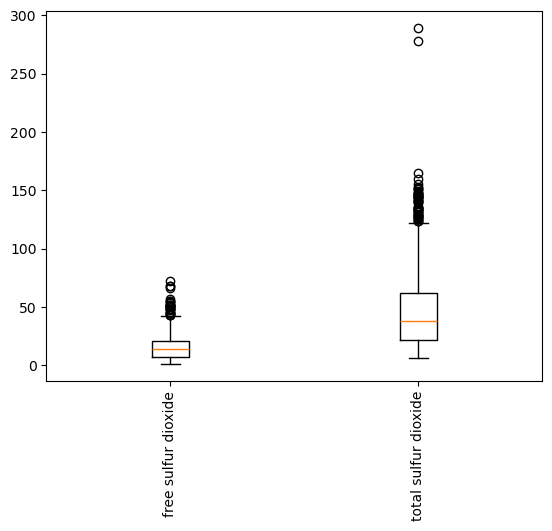

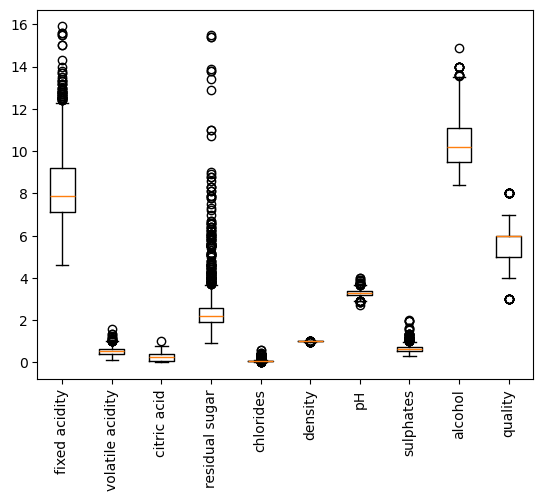

In [219]:
import matplotlib.pyplot as plt
data1 = rd[['free sulfur dioxide','total sulfur dioxide']]
data2 = rd.drop(labels=['free sulfur dioxide','total sulfur dioxide'],axis=1)

plt.boxplot(data1.values)
plt.xticks(ticks=range(1, len(data1.columns) + 1), labels=data1.columns)
plt.tick_params(axis='x', rotation=90) 
plt.show()

plt.boxplot(data2.values)
plt.xticks(ticks=range(1, len(data2.columns) + 1), labels=data2.columns)
plt.tick_params(axis='x', rotation=90) 
plt.show()

# Część 2 - Regresja
* zbudować model przewidujący prostą zmienna np. gęstość
* zbudować bardziej zaawansowany model, przewidujacy ilość alkoholu w winie

## Przewidywanie kwasowości na podstawie podanej podanej gęstości

In [220]:
# Sprobójmy połączyć dwa data sety
data = pd.concat(
    [pd.concat([rd.density,wd.density],axis=0),pd.concat([rd['fixed acidity'],wd['fixed acidity']], axis=0)],
    axis=1,
    ignore_index=True).rename(columns = {0:'fixed acidity',1:'density'})
x = data.density.values.reshape(-1,1)
y = data['fixed acidity'].values.reshape(-1)

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.33, random_state=48)

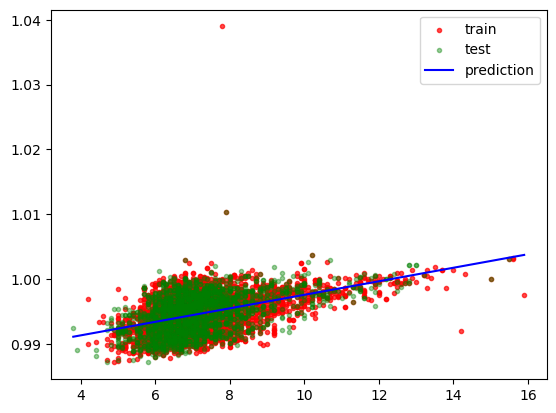

Współczynniki dla danego modelu o stopniu 1 są odpowiednie [0.0, 0.0010436510190558236]


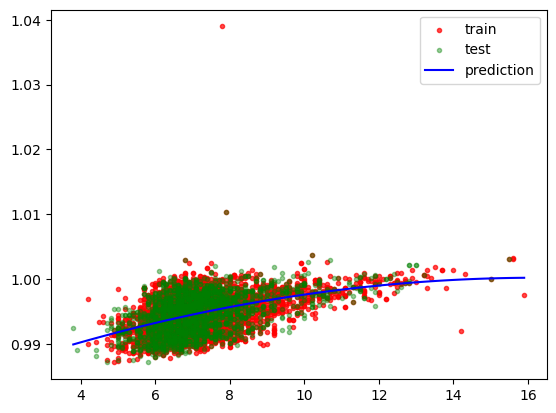

Współczynniki dla danego modelu o stopniu 2 są odpowiednie [0.0, 0.002155420003850065, -6.623770857418314e-05]


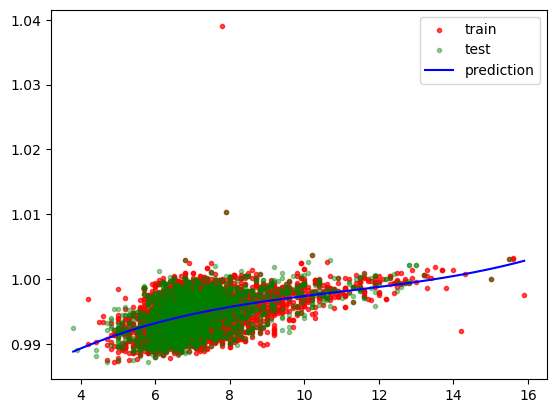

Współczynniki dla danego modelu o stopniu 3 są odpowiednie [0.0, 0.004870612174960911, -0.00037975013570686294, 1.1501397764517852e-05]


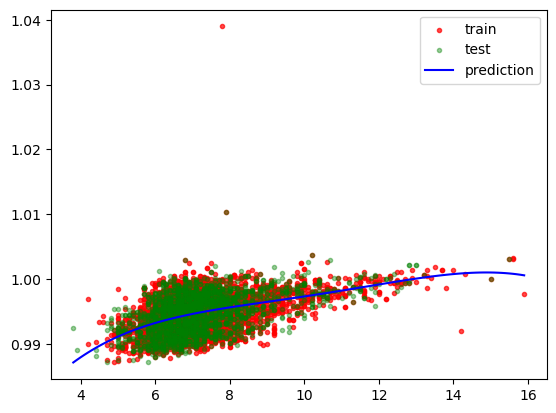

Współczynniki dla danego modelu o stopniu 4 są odpowiednie [0.0, 0.014979764090452883, -0.0021069334574394887, 0.00013757472729983985, -3.312594496358203e-06]


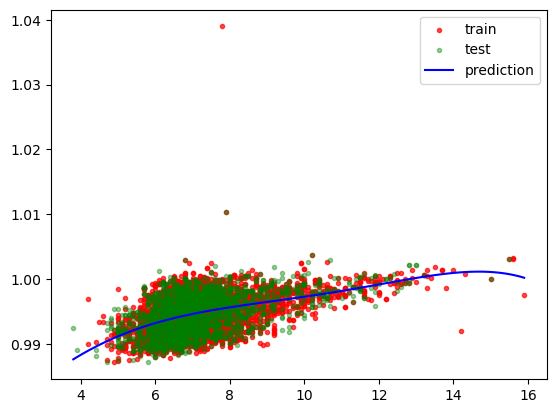

Współczynniki dla danego modelu o stopniu 5 są odpowiednie [0.0, 0.0075200337235314775, -0.0003921737606074999, -5.3006496310714254e-05, 6.920305194046907e-06, -2.1233054039758347e-07]


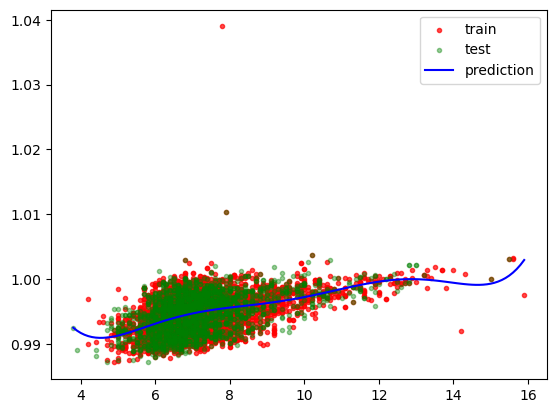

Współczynniki dla danego modelu o stopniu 6 są odpowiednie [0.0, -0.1866243435477464, 0.056163683480144846, -0.008586590900133341, 0.0007101999504034359, -3.0231946061954694e-05, 5.187559598303323e-07]


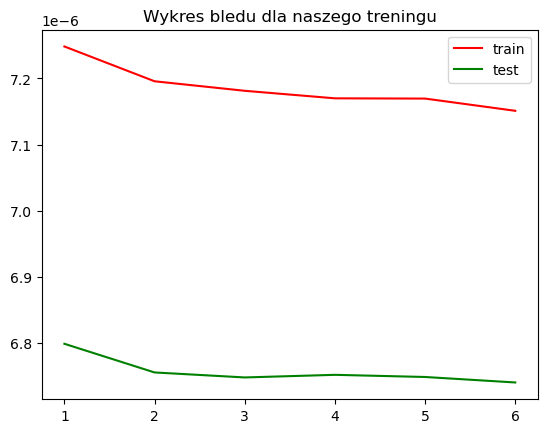

In [221]:
error_train = []
error_test = []
degree_num = 7

for degree in range(1,degree_num):

    plt.scatter(x_train,y_train,c='red',marker='.',alpha=0.7)
    plt.scatter(x_test,y_test, c='green',marker='.',alpha=0.4)
    poly = PolynomialFeatures(degree=degree)
    model = LinearRegression()
    
    x_trans_train = poly.fit_transform(x_train)
    model.fit(x_trans_train, y_train)
    
    x_plot = np.arange(x.min(), x.max(),0.1).reshape(-1,1)
    
    plt.plot(x_plot, model.predict(poly.fit_transform(x_plot)),color='blue')
    plt.legend(['train','test', 'prediction'])
    plt.show()
        
    error_train.append(mean_squared_error(model.predict(x_trans_train), y_train))
    error_test.append(mean_squared_error(model.predict(poly.fit_transform(x_test)),y_test))
    print(f"Współczynniki dla danego modelu o stopniu {degree} są odpowiednie {model.coef_.tolist()}")
plt.title("Wykres bledu dla naszego treningu")
plt.plot([i for i in range(1,degree_num)],error_train, color='red')
plt.plot([i for i in range(1,degree_num)],error_test, color='green')
plt.legend(['train','test'])
plt.show()

### Spróbujmy jeszcze ridge regression

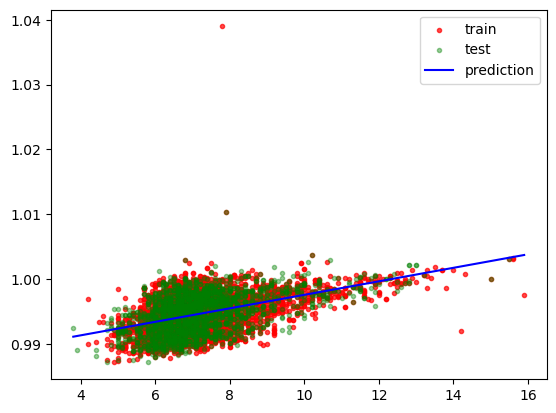

Współczynniki dla danego modelu o stopniu 1 są odpowiednie [0.0, 0.0010422341432972813]. Lambda wynosi (10, 6.798892184925869e-06)


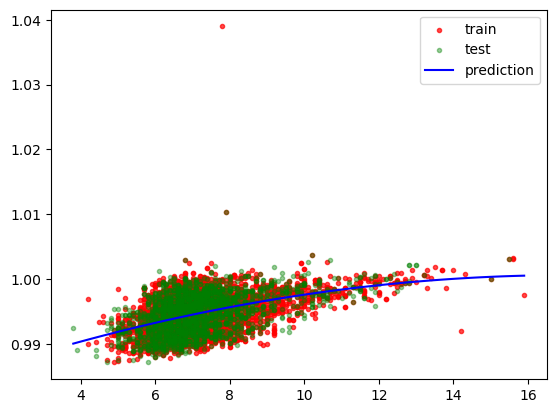

Współczynniki dla danego modelu o stopniu 2 są odpowiednie [0.0, 0.0020422449608335004, -5.9660302192121974e-05]. Lambda wynosi (10, 6.7557007205925856e-06)


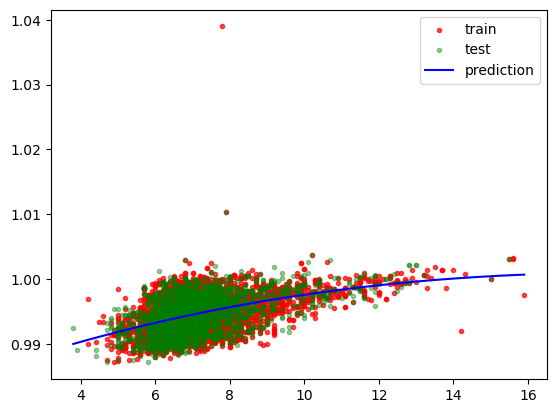

Współczynniki dla danego modelu o stopniu 3 są odpowiednie [0.0, 0.0021775728608709067, -7.571833690751629e-05, 6.05173342623014e-07]. Lambda wynosi (10, 6.754596164566964e-06)


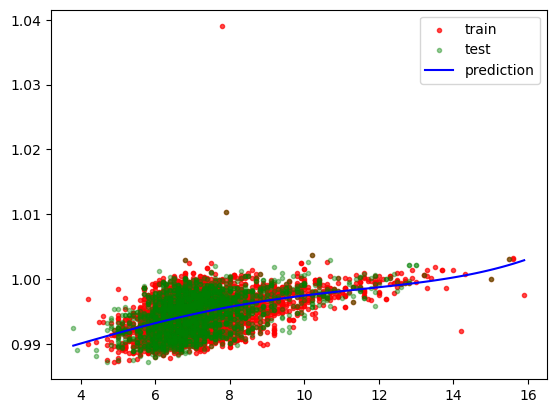

Współczynniki dla danego modelu o stopniu 4 są odpowiednie [0.0, 0.0007015843536061594, 0.00028470038216026414, -3.3540840253684e-05, 1.0959415892203069e-06]. Lambda wynosi (10, 6.751895805880792e-06)


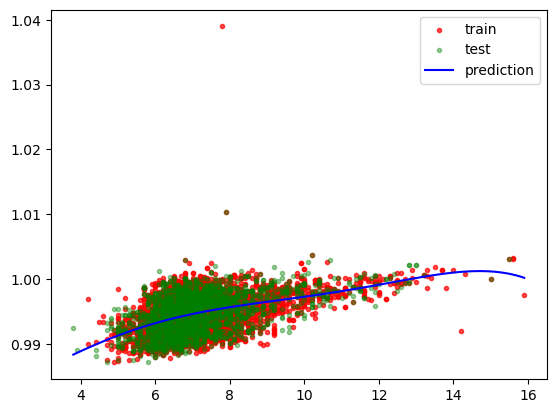

Współczynniki dla danego modelu o stopniu 5 są odpowiednie [0.0, 0.0002841050365389077, 0.0011440807743339021, -0.00021058535918285772, 1.4734442532845671e-05, -3.624155317921743e-07]. Lambda wynosi (10, 6.744031942487693e-06)


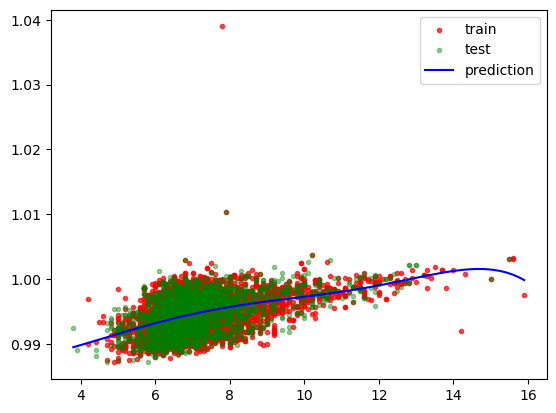

Współczynniki dla danego modelu o stopniu 6 są odpowiednie [0.0, 6.917403340530478e-06, 4.136222113213734e-05, 0.0001098432334133382, -2.2484089298921705e-05, 1.6145245372273681e-06, -3.9751439473059054e-08]. Lambda wynosi (2010, 6.743905574312956e-06)


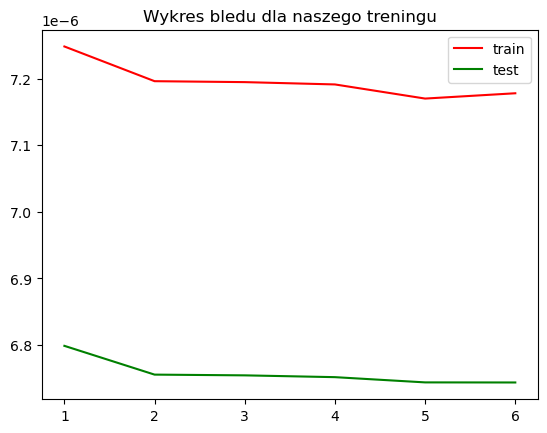

In [222]:
error_train = []
error_test = []

degree_num = 7

for degree in range(1,degree_num):
    poly = PolynomialFeatures(degree=degree)
    best_lam = (0,np.inf)
    for lam in range(10,50000,100):
        model = Ridge(alpha=lam)
        
        x_trans_train = poly.fit_transform(x_train)
        model.fit(x_trans_train, y_train)
            
        err_tst = (mean_squared_error(model.predict(poly.fit_transform(x_test)),y_test))
        if best_lam[1] > err_tst:
            best_lam = (lam,err_tst)
            
    plt.scatter(x_train,y_train,c='red',marker='.',alpha=0.7)
    plt.scatter(x_test,y_test, c='green',marker='.',alpha=0.4)
    model = Ridge(alpha=best_lam[0])
    
    x_trans_train = poly.fit_transform(x_train)
    model.fit(x_trans_train, y_train)
        
    error_train.append(mean_squared_error(model.predict(x_trans_train), y_train))
    error_test.append(mean_squared_error(model.predict(poly.fit_transform(x_test)),y_test))
    x_plot = np.arange(x.min(), x.max(),0.1).reshape(-1,1)
    plt.plot(x_plot, model.predict(poly.fit_transform(x_plot)),color='blue')
    plt.legend(['train','test', 'prediction'])
    plt.show()
    print(f"Współczynniki dla danego modelu o stopniu {degree} są odpowiednie {model.coef_.tolist()}. Lambda wynosi {best_lam}")

    
plt.title("Wykres bledu dla naszego treningu")
plt.plot([i for i in range(1,degree_num)],error_train, color='red')
plt.plot([i for i in range(1,degree_num)],error_test, color='green')
plt.legend(['train','test'])
plt.show()

### Spróbujmy teraz zrobić troche bardziej zaawansowany model. Skupmy sie na przewidzeniu ile alkoholu będzie w winie

In [223]:
# Setup
